# Agregar Gráficos Vectoriales a la Web

Los gráficos vectoriales son muy útiles en muchas circunstancias — tienen tamaño de archivo pequeños y son altamente escalables, por lo que no se pixelan cuando se amplían a un tamaño más grande.
> Nota: Este artículo no tiene la intención de enseñarte SVG; solo mostrarte qué es, y cómo agregarlo a las páginas web.

## ¿Qué son los gráficos vectoriales?

En la web, trabajarás con dos tipos de imágenes — imágenes __rasterizadas__, e imágenes __vectoriales__:

* Las imágenes __ráster__ se definen mediante una cuadrícula de píxeles. Un archivo de imagen rasterizado contiene información que muestra exactamente dónde se colocará cada píxel y exactamente de qué color debe ser. Los formatos de ráster web populares incluyen mapa de bits (.bmp), PNG (.png), JPEG (.jpg), and GIF (.gif).

* Las imágenes __vectoriales__ se definen mediante algoritmos. Un archivo de imagen vectorial contiene definiciones de forma y ruta que la computadora puede usar para determinar cómo debería verse la imagen cuando se representa en la pantalla. El formato __SVG__ nos permite crear poderosos gráficos vectoriales para usar en la Web.

La diferencia se hace evidente cuando se amplía la página. La imagen PNG se pixela a medida que se acerca porque contiene información sobre dónde debería estar cada píxel (y de qué color). Cuando se amplía, cada píxel simplemente aumenta de tamaño para llenar varios píxeles en la pantalla, por lo que la imagen comienza a verse borrosa. La imagen vectorial sigue luciendo agradable y nítida, porque no importa el tamaño que tenga, los algoritmos se utilizan para resolver las formas en la imagen, y los valores simplemente se escalan a medida que aumenta.

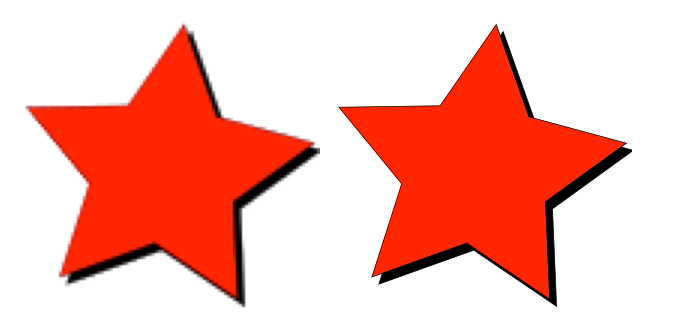

Además, los archivos de imágenes vectoriales son mucho más ligeros que sus equivalentes ráster, porque solo necesitan contener un puñado de algoritmos, en lugar de información sobre cada píxel de la imagen individualmente.

## ¿Qué es SVG?

__SVG__ es un lenguaje, basado en XML, para describir imágenes vectoriales. Básicamente es un marcado, como HTML, excepto que tiene muchos elementos diferentes para definir las formas que desea que aparezcan en su imagen y los efectos que desea aplicar a esas formas. SVG es para marcar gráficos, no contenido. En el extremo más simple del espectro, tienes elementos para crear formas simples, como `<circle>` and `<rect>`. Las funciones SVG más avanzadas incluyen `<feColorMatrix>` (transformar colores usando una matriz de transformación), `<animate>` (animar partes de su gráfico vectorial), y `<mask>` (aplica una máscara sobre la parte superior de tu imagen).

In [1]:
<svg version="1.1"
    baseProfile="full"
    width="300" height="200"
    xmlns="http://www.w3.org/2000/svg">
    <rect width="100%" height="100%" fill="black" />
    <circle cx="150" cy="100" r="90" fill="blue" />
</svg>

Puede tener la impresión de que SVG es fácil de codificar manualmente. Sí, puede codificar manualmente SVG simple en un editor de texto, pero para una imagen compleja, esto rápidamente comienza a ser muy difícil. Para crear imágenes SVG, la mayoría de la gente usa un editor de gráficos vectoriales como Inkscape o Illustrator. Estos paquetes le permiten crear una variedad de ilustraciones utilizando varias herramientas gráficas y crear aproximaciones de fotos.

SVG tiene algunas ventajas adicionales:

* El texto en imágenes vectoriales sigue siendo accesible (lo que también beneficia a su SEO).
* Los SVG se prestan bien al estilo / scripting, porque cada componente de la imagen es un elemento que se puede diseñar a través de CSS o scripting a través de JavaScript.

Ddesventajas: 

* SVG puede complicarse rápidamente, lo que significa que el tamaño de los archivos puede crecer. Además, los SVG complejos también pueden requerir un tiempo de procesamiento significativo en el navegador.
* SVG puede ser más difícil de crear que las imágenes rasterizadas, dependiendo del tipo de imagen que intente crear.
* SVG no es compatible con navegadores más antiguos, por lo que puede no ser adecuado si necesita admitir versiones anteriores de Internet Explorer con su sitio web (SVG comenzó a ser compatible a partir de IE9).

## Agregar SVG a sus páginas

### La forma rápida: `<img>`

Para incrustar un SVG a través de un elemento `<img>`, solo necesita hacer referencia a él en el atributo src como es de esperar. Necesitará un atributo de altura o ancho (o ambos si su SVG no tiene una relación de aspecto inherente).

In [2]:
<img
    src="equilateral.svg"
    alt="triangle with all three sides equal"
    height="87"
    width="100" />

Ventajas: 

* Sintaxis de imagen rápida y familiar con equivalente de texto integrado disponible en el atributo alt.
* Puede convertir la imagen en un hipervínculo fácilmente anidando el `<img>` dentro de un elemento `<a>`.
* El navegador puede almacenar en caché el archivo SVG, lo que da como resultado tiempos de carga más rápidos para cualquier página que utilice la imagen cargada en el futuro.

Desventajas:

* No puede manipular la imagen con JavaScript.
* Si desea controlar el contenido SVG con CSS, debe incluir estilos CSS en línea en su código SVG. (Las hojas de estilo externas invocadas desde el archivo SVG no tienen efecto).
* No puede cambiar el estilo de la imagen con pseudoclases CSS (como `:focus`).

#### Solución de problemas y compatibilidad con varios navegadores

Para los navegadores que no admiten SVG (IE 8 y versiones anteriores, Android 2.3 y versiones anteriores), puede hacer referencia a un PNG o JPG de su atributo src y usar un atributo `srcset` ( que solo los navegadores recientes reconocen) para hacer referencia al SVG. Siendo este el caso, solo los navegadores compatibles cargarán el SVG; los navegadores más antiguos cargarán el PNG en su lugar.

In [3]:
<img src="equilateral.png" alt="triangle with equal sides" srcset="equilateral.svg">

También puede usar SVG como imágenes de fondo CSS. En el siguiente código, los navegadores más antiguos se quedarán con el PNG que entienden, mientras que los navegadores más nuevos cargarán el SVG.

In [4]:
<style>
    background: url("fallback.png") no-repeat center;
    background-image: url("image.svg");
    background-size: contain;
</style>

La inserción de SVG con imágenes de fondo CSS significa que el SVG no se puede manipular con JavaScript y también está sujeto a las mismas limitaciones de CSS.

### Incluir código SVG dentro de su HTML

También puede abrir el archivo SVG en un editor de texto, copiar el código SVG y pegarlo en su documento HTML; esto a veces se denomina poner su SVG en línea o SVG en línea.

In [5]:
<svg width="300" height="200">
    <rect width="100%" height="100%" fill="green" />
</svg>

Ventajas:

* Poner su SVG en línea ahorra una solicitud HTTP y, por lo tanto, puede reducir un poco su tiempo de carga.
* Puede asignar clases e identificadores a elementos SVG y aplicarles estilo con CSS, ya sea dentro del SVG o donde quiera que ponga las reglas de estilo CSS para su documento HTML. De hecho, puede utilizar cualquier atributo de presentación SVG como propiedad CSS.
* SVG en línea es el único enfoque que le permite usar interacciones CSS (como `:focus`) y animaciones CSS en su imagen SVG (incluso en su hoja de estilo normal).
* Puede convertir el marcado SVG en un hipervínculo envolviéndolo en un elemento `<a>`.

Desventajas:

* Este método solo es adecuado si está utilizando SVG en un solo lugar. La duplicación hace que el mantenimiento requiera muchos recursos.
* El código SVG adicional aumenta el tamaño de su archivo HTML.
* El navegador no puede almacenar en caché SVG en línea, ya que almacenaría en caché activos de imagen normales, por lo que las páginas que incluyen la imagen no se cargarán más rápido después de que se cargue la primera página que contiene la imagen.
* Puede incluir respaldo en un elemento `<foreignObject>`, pero los navegadores que admiten SVG aún descargan las imágenes de respaldo. Debe sopesar si la sobrecarga adicional realmente vale la pena, solo para admitir navegadores obsoletos.

### Incrustar un SVG con un `<iframe>`